In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# read in csv
data = pd.read_csv('NBA Team Data 2000 - 2020.csv')

data.head()

,Year,Team,G,Win,Loss,MP,FG,FGA,FG%,3P,...,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%,Playoffs
0,2000,Atlanta Hawks,82,28,54,241.8,36.6,83.0,0.441,3.1,...,21.0,94.3,102.0,107.9,-5.9,91.7,0.503,0.460,0.481,N
1,2000,Boston Celtics,82,35,47,240.6,37.2,83.9,0.444,5.1,...,27.1,99.3,104.8,105.6,-0.8,94.6,0.520,0.474,0.498,N
2,2000,Charlotte Hornets,82,49,33,241.2,35.8,79.7,0.449,4.1,...,20.4,98.4,104.3,101.4,2.9,93.9,0.530,0.475,0.478,Y
3,2000,Chicago Bulls,82,17,65,241.5,31.3,75.4,0.415,4.1,...,23.3,84.8,94.2,104.6,-10.4,89.4,0.490,0.443,0.484,N
4,2000,Cleveland Cavaliers,82,32,50,242.1,36.3,82.1,0.442,4.2,...,27.1,97.0,100.4,104.0,-3.6,95.7,0.516,0.468,0.474,N


In [3]:
# replace * on some team names
data['Team'] = data['Team'].str.replace('*', '')

data.head(50)

,Year,Team,G,Win,Loss,MP,FG,FGA,FG%,3P,...,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%,Playoffs
0,2000,Atlanta Hawks,82,28,54,241.8,36.6,83.0,0.441,3.1,...,21.0,94.3,102.0,107.9,-5.9,91.7,0.503,0.460,0.481,N
1,2000,Boston Celtics,82,35,47,240.6,37.2,83.9,0.444,5.1,...,27.1,99.3,104.8,105.6,-0.8,94.6,0.520,0.474,0.498,N
2,2000,Charlotte Hornets,82,49,33,241.2,35.8,79.7,0.449,4.1,...,20.4,98.4,104.3,101.4,2.9,93.9,0.530,0.475,0.478,Y
3,2000,Chicago Bulls,82,17,65,241.5,31.3,75.4,0.415,4.1,...,23.3,84.8,94.2,104.6,-10.4,89.4,0.490,0.443,0.484,N
4,2000,Cleveland Cavaliers,82,32,50,242.1,36.3,82.1,0.442,4.2,...,27.1,97.0,100.4,104.0,-3.6,95.7,0.516,0.468,0.474,N
5,2000,Dallas Mavericks,82,40,42,240.6,39.0,85.9,0.453,6.3,...,21.6,101.4,106.6,107.2,-0.6,94.9,0.532,0.490,0.488,N
6,2000,Denver Nuggets,82,35,47,242.1,37.3,84.3,0.442,5.7,...,23.9,99.0,103.5,105.8,-2.3,94.7,0.517,0.476,0.479,N
7,2000,Detroit Pistons,82,42,40,241.8,37.1,80.9,0.459,5.4,...,24.5,103.5,107.3,105.8,1.5,95.7,0.548,0.492,0.499,Y
8,2000,Golden State Warriors,82,19,63,240.9,36.5,87.1,0.420,4.2,...,24.9,95.5,99.8,108.4,-8.6,95.4,0.484,0.444,0.499,N
9,2000,Houston Rockets,82,34,48,241.8,36.6,81.3,0.450,7.1,...,20.3,99.5,104.8,105.7,-0.9,94.2,0.536,0.494,0.481,N


In [4]:
print(data.shape)

(625, 35)


In [5]:
data.columns

Index(['Year', 'Team', 'G', 'Win', 'Loss', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Ortg', 'DRtg', 'NRtg',
       'Pace', 'TS%', 'eFG%', 'OeFG%', 'Playoffs'],
      dtype='object')

In [6]:
# remove 2020 season where playoffs is NaN
data = data.iloc[:595]

In [7]:
teams = data['Team'].unique()
print(teams)

['Atlanta Hawks' 'Boston Celtics' 'Charlotte Hornets' 'Chicago Bulls'
 'Cleveland Cavaliers' 'Dallas Mavericks' 'Denver Nuggets'
 'Detroit Pistons' 'Golden State Warriors' 'Houston Rockets'
 'Indiana Pacers' 'Los Angeles Clippers' 'Los Angeles Lakers' 'Miami Heat'
 'Milwaukee Bucks' 'Minnesota Timberwolves' 'New Jersey Nets'
 'New York Knicks' 'Orlando Magic' 'Philadelphia 76ers' 'Phoenix Suns'
 'Portland Trail Blazers' 'Sacramento Kings' 'San Antonio Spurs'
 'Seattle SuperSonics' 'Toronto Raptors' 'Utah Jazz' 'Vancouver Grizzlies'
 'Washington Wizards' 'Memphis Grizzlies' 'New Orleans Hornets'
 'Charlotte Bobcats' 'New Orleans/Oklahoma City Hornets'
 'Oklahoma City Thunder' 'Brooklyn Nets' 'New Orleans Pelicans']


In [8]:
# replace old team names with new team names for consistency
data.replace('New Jersey Nets', 'Brooklyn Nets')
data.replace('Seattle Supersonics', 'Oklahoma City Thunder')
data.replace('New Orleans Hornets', 'New Orleans Pelicans')
data.replace('New Orleans/Oklahoma City Hornets', 'New Orleans Pelicans')
data.replace('Charlotte Bobcats', 'Charlotte Hornets')
data.replace('Vancouver Grizzlies', 'Memphis Grizzlies')

,Year,Team,G,Win,Loss,MP,FG,FGA,FG%,3P,...,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%,Playoffs
0,2000,Atlanta Hawks,82,28,54,241.8,36.6,83.0,0.441,3.1,...,21.0,94.3,102.0,107.9,-5.9,91.7,0.503,0.460,0.481,N
1,2000,Boston Celtics,82,35,47,240.6,37.2,83.9,0.444,5.1,...,27.1,99.3,104.8,105.6,-0.8,94.6,0.520,0.474,0.498,N
2,2000,Charlotte Hornets,82,49,33,241.2,35.8,79.7,0.449,4.1,...,20.4,98.4,104.3,101.4,2.9,93.9,0.530,0.475,0.478,Y
3,2000,Chicago Bulls,82,17,65,241.5,31.3,75.4,0.415,4.1,...,23.3,84.8,94.2,104.6,-10.4,89.4,0.490,0.443,0.484,N
4,2000,Cleveland Cavaliers,82,32,50,242.1,36.3,82.1,0.442,4.2,...,27.1,97.0,100.4,104.0,-3.6,95.7,0.516,0.468,0.474,N
5,2000,Dallas Mavericks,82,40,42,240.6,39.0,85.9,0.453,6.3,...,21.6,101.4,106.6,107.2,-0.6,94.9,0.532,0.490,0.488,N
6,2000,Denver Nuggets,82,35,47,242.1,37.3,84.3,0.442,5.7,...,23.9,99.0,103.5,105.8,-2.3,94.7,0.517,0.476,0.479,N
7,2000,Detroit Pistons,82,42,40,241.8,37.1,80.9,0.459,5.4,...,24.5,103.5,107.3,105.8,1.5,95.7,0.548,0.492,0.499,Y
8,2000,Golden State Warriors,82,19,63,240.9,36.5,87.1,0.420,4.2,...,24.9,95.5,99.8,108.4,-8.6,95.4,0.484,0.444,0.499,N
9,2000,Houston Rockets,82,34,48,241.8,36.6,81.3,0.450,7.1,...,20.3,99.5,104.8,105.7,-0.9,94.2,0.536,0.494,0.481,N


In [9]:
data.describe()

,Year,G,Win,Loss,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%
count,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,...,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000,595.000000
mean,2009.563025,81.189916,40.594958,40.594958,241.780000,37.225546,82.312101,0.452254,6.974790,19.581176,...,14.535294,21.120672,99.623025,106.209748,106.202521,0.007227,93.060840,0.536029,0.494355,0.494292
std,5.752526,3.503615,12.387092,12.388315,0.886574,2.101511,3.451890,0.015769,2.326737,6.239087,...,1.173199,1.773304,5.896060,3.802268,3.599408,4.797705,3.404908,0.021148,0.023320,0.021391
min,2000.000000,66.000000,7.000000,9.000000,240.000000,31.300000,74.300000,0.408000,2.500000,7.800000,...,11.200000,16.600000,84.200000,92.200000,94.100000,-15.200000,86.200000,0.469000,0.428000,0.433000
25%,2005.000000,82.000000,32.000000,32.000000,241.200000,35.900000,79.800000,0.442000,5.250000,15.100000,...,13.800000,20.000000,95.600000,103.750000,103.800000,-3.300000,90.650000,0.521000,0.477000,0.479000
50%,2010.000000,82.000000,41.000000,40.000000,241.800000,37.000000,82.100000,0.451000,6.600000,18.600000,...,14.500000,21.000000,98.700000,106.000000,106.400000,0.200000,92.600000,0.535000,0.492000,0.493000
75%,2015.000000,82.000000,50.000000,49.000000,242.400000,38.600000,84.500000,0.462000,8.500000,23.550000,...,15.200000,22.350000,103.250000,108.800000,108.750000,3.500000,95.250000,0.549000,0.509000,0.510000
max,2019.000000,82.000000,73.000000,72.000000,244.900000,44.000000,94.000000,0.504000,16.100000,45.400000,...,19.000000,27.100000,118.100000,115.900000,117.600000,11.600000,103.900000,0.603000,0.569000,0.564000


In [10]:
# inconsistencies found within data, these 3 teams actually made the playoffs
test = (data.Win >= 50) & (data.Playoffs =='N')
test2 = data[test]
test2

,Year,Team,G,Win,Loss,MP,FG,FGA,FG%,3P,...,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%,Playoffs
358,2012,Charlotte Bobcats,82,50,16,241.5,34.4,81.1,0.425,5.7,...,19.0,93.4,101.5,111.5,-10.0,91.5,0.507,0.460,0.524,N
392,2013,Denver Nuggets,82,57,25,240.9,38.4,85.9,0.447,8.6,...,23.0,104.4,106.0,108.2,-2.2,98.1,0.536,0.497,0.500,N
404,2013,New York Knicks,82,54,28,242.1,36.9,82.2,0.449,9.3,...,22.1,98.6,108.3,109.1,-0.8,90.3,0.541,0.505,0.514,N


In [11]:
# changes the teams to playoff teams
data.loc[358, 'Playoffs'] = 'Y'
data.loc[392, 'Playoffs'] = 'Y'
data.loc[404, 'Playoffs'] = 'Y'

In [12]:
data.isna().sum()

Year        0
Team        0
G           0
Win         0
Loss        0
MP          0
FG          0
FGA         0
FG%         0
3P          0
3PA         0
3P%         0
2P          0
2PA         0
2P%         0
FT          0
FTA         0
FT%         0
ORB         0
DRB         0
TRB         0
AST         0
STL         0
BLK         0
TOV         0
PF          0
PTS         0
Ortg        0
DRtg        0
NRtg        0
Pace        0
TS%         0
eFG%        0
OeFG%       0
Playoffs    0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


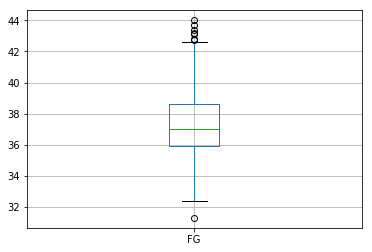

In [13]:
print(data.boxplot(['FG']))

# outliers seem to be found by itself

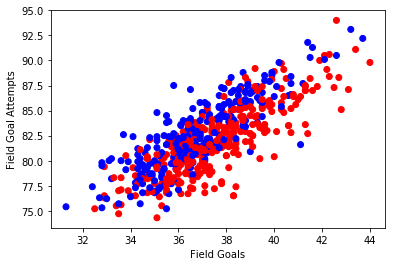

[[1.         0.78854653]
 [0.78854653 1.        ]]


In [14]:
colors = {'Y':'red', 'N':'blue'}
plt.scatter(data['FG'], data['FGA'], c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Field Goals')
plt.ylabel('Field Goal Attempts')
plt.show()

print(np.corrcoef(data['FG'], data['FGA']))

# positive correlation between FGs and FGA, no outliers when combined with FG and FGA
# more FGA usually seems to have more FGs
# 81% correlation so pretty good linear relationship

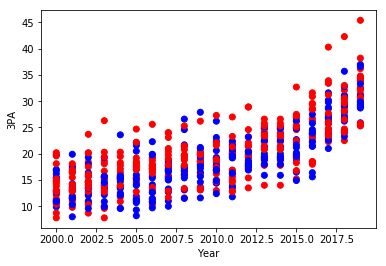

In [15]:
plt.scatter(data['Year'], data['3PA'], c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('3PA')
plt.show()
# 3PA increased as the years went on

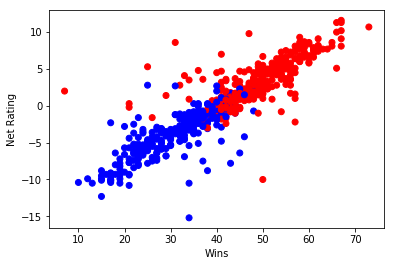

In [16]:
plt.scatter(data['Win'], data['NRtg'],c=data['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Wins')
plt.ylabel('Net Rating')
plt.show()
# shows net rating of all teams, for the most part teams with more wins had higher net ratings
# some had higher net ratings and had low amount of wins and it might be

In [17]:
playoff = data.loc[data['Playoffs'] == 'Y']
playoff.shape

(322, 35)

In [18]:
nonplayoff = data.loc[data['Playoffs'] == 'N']
nonplayoff.shape

(273, 35)

In [19]:
playoff.describe()

,Year,G,Win,Loss,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,...,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,2009.537267,81.198758,49.211180,31.940994,241.812112,37.582298,82.033851,0.458130,7.313354,20.209938,...,14.231677,20.859627,100.907453,107.808385,104.430124,3.378261,92.845652,0.544000,0.502435,0.486168
std,5.763796,3.481719,8.213969,7.636582,0.895024,2.118108,3.414821,0.015384,2.398671,6.355474,...,1.076305,1.720117,5.803512,3.393033,3.189429,2.984596,3.338718,0.020248,0.022954,0.019684
min,2000.000000,66.000000,7.000000,9.000000,240.000000,32.500000,74.300000,0.415000,2.500000,7.800000,...,11.200000,16.800000,88.700000,100.300000,94.100000,-10.000000,86.300000,0.501000,0.452000,0.433000
25%,2005.000000,82.000000,44.000000,27.000000,241.200000,36.225000,79.500000,0.447000,5.600000,15.600000,...,13.600000,19.600000,96.800000,105.325000,102.400000,1.100000,90.200000,0.529000,0.486250,0.472250
50%,2010.000000,82.000000,49.000000,32.000000,241.800000,37.400000,81.900000,0.458000,6.900000,19.150000,...,14.200000,20.800000,100.500000,107.700000,104.500000,3.200000,92.500000,0.543000,0.500000,0.486000
75%,2014.000000,82.000000,55.000000,38.000000,242.400000,38.800000,84.075000,0.468000,8.800000,24.075000,...,14.900000,22.100000,104.375000,110.475000,106.675000,5.200000,95.000000,0.557000,0.518000,0.501000
max,2019.000000,82.000000,73.000000,61.000000,244.900000,44.000000,94.000000,0.503000,16.100000,45.400000,...,17.000000,25.700000,118.100000,115.900000,111.900000,11.600000,103.300000,0.603000,0.569000,0.540000


In [20]:
nonplayoff.describe()

,Year,G,Win,Loss,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,...,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,2009.593407,81.179487,30.432234,50.802198,241.742125,36.804762,82.640293,0.445322,6.575458,18.839560,...,14.893407,21.428571,98.108059,104.324176,108.293040,-3.968864,93.314652,0.526626,0.484824,0.503875
std,5.749638,3.535641,7.994712,8.549879,0.876628,2.005382,3.472749,0.013214,2.176399,6.026557,...,1.183570,1.788749,5.649122,3.375136,2.860569,3.230237,3.470348,0.018136,0.019933,0.019280
min,2000.000000,66.000000,10.000000,28.000000,240.000000,31.300000,75.200000,0.408000,2.700000,8.000000,...,11.500000,16.600000,84.200000,92.200000,100.200000,-15.200000,86.200000,0.469000,0.428000,0.449000
25%,2005.000000,82.000000,24.000000,45.000000,241.200000,35.400000,80.200000,0.438000,5.000000,14.500000,...,14.100000,20.300000,94.200000,102.300000,106.400000,-6.000000,90.900000,0.515000,0.473000,0.490000
50%,2010.000000,82.000000,31.000000,50.000000,241.800000,36.600000,82.300000,0.446000,6.300000,18.000000,...,14.800000,21.300000,97.500000,104.600000,108.200000,-3.600000,92.600000,0.527000,0.484000,0.504000
75%,2015.000000,82.000000,36.000000,57.000000,242.400000,38.100000,85.300000,0.453000,7.900000,22.400000,...,15.600000,22.600000,101.500000,106.200000,110.300000,-1.500000,95.600000,0.539000,0.499000,0.518000
max,2019.000000,82.000000,48.000000,72.000000,244.300000,43.700000,93.100000,0.504000,13.000000,37.000000,...,19.000000,27.100000,115.400000,113.600000,117.600000,2.800000,103.900000,0.584000,0.545000,0.564000


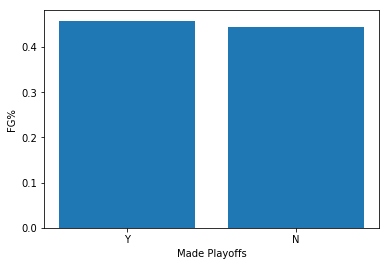

In [21]:
plt.bar(['Y', 'N'], [playoff['FG%'].mean(), nonplayoff['FG%'].mean()])
plt.xlabel('Made Playoffs')
plt.ylabel('FG%')
plt.show()

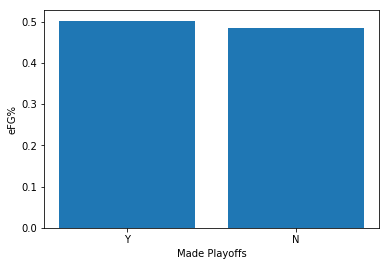

In [22]:
plt.bar(['Y', 'N'], [playoff['eFG%'].mean(), nonplayoff['eFG%'].mean()])
plt.xlabel('Made Playoffs')
plt.ylabel('eFG%')
plt.show()

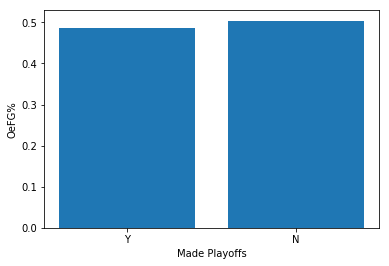

In [23]:
plt.bar(['Y', 'N'], [playoff['OeFG%'].mean(), nonplayoff['OeFG%'].mean()])
plt.xlabel('Made Playoffs')
plt.ylabel('OeFG%')
plt.show()

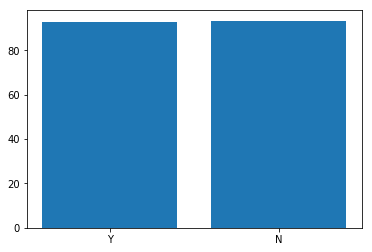

In [24]:
plt.bar(['Y', 'N'], [playoff['Pace'].mean(), nonplayoff['Pace'].mean()])
plt.show()

In [25]:
# drop both team names and year as this should be removed to make srue it does not affect the dataset
data = data.drop(['Team'], axis = 1)
data = data.drop(['Year'], axis = 1)

data.head()

,G,Win,Loss,MP,FG,FGA,FG%,3P,3PA,3P%,...,PF,PTS,Ortg,DRtg,NRtg,Pace,TS%,eFG%,OeFG%,Playoffs
0,82,28,54,241.8,36.6,83.0,0.441,3.1,9.9,0.317,...,21.0,94.3,102.0,107.9,-5.9,91.7,0.503,0.460,0.481,N
1,82,35,47,240.6,37.2,83.9,0.444,5.1,15.4,0.331,...,27.1,99.3,104.8,105.6,-0.8,94.6,0.520,0.474,0.498,N
2,82,49,33,241.2,35.8,79.7,0.449,4.1,12.2,0.339,...,20.4,98.4,104.3,101.4,2.9,93.9,0.530,0.475,0.478,Y
3,82,17,65,241.5,31.3,75.4,0.415,4.1,12.6,0.329,...,23.3,84.8,94.2,104.6,-10.4,89.4,0.490,0.443,0.484,N
4,82,32,50,242.1,36.3,82.1,0.442,4.2,11.2,0.373,...,27.1,97.0,100.4,104.0,-3.6,95.7,0.516,0.468,0.474,N


In [26]:
# Decision Tree

data_y = data['Playoffs']
data_x = data.drop(['Playoffs'], axis = 1)
print(data_y.shape)
print(data_x.shape)

(595,)
(595, 32)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_x_scaled = scaler.fit_transform(data_x)

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(data_x_scaled, data_y, test_size = 0.20)

print("X_train=",x_train.shape, " y_train=", y_train.shape)
print("X_test=",x_test.shape, " y_test=", y_test.shape)

X_train= (476, 32)  y_train= (476,)
X_test= (119, 32)  y_test= (119,)


In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, svd_solver='full')
x_train_pca = pca.fit_transform(x_train)

var_exp = pca.explained_variance_ratio_
print("Variance in each PC:", var_exp)

cum_var_exp = np.cumsum(var_exp)
print("Cumulative variance:", cum_var_exp)

x_test_pca = pca.transform(x_test)

print(x_train_pca.shape, x_test_pca.shape)

Variance in each PC: [0.34015981 0.15239567 0.09972082 0.0793622  0.0621965  0.04457659
 0.03655865 0.03156244 0.03091678 0.02820973 0.02219618 0.01959381
 0.01355293]
Cumulative variance: [0.34015981 0.49255548 0.5922763  0.6716385  0.73383501 0.77841159
 0.81497024 0.84653269 0.87744947 0.9056592  0.92785537 0.94744919
 0.96100212]
(476, 13) (119, 13)


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

params = {'max_depth': [5, 10, 15, 20], 'min_samples_leaf': [5, 10, 15, 20], 'max_features': [5, 10, 15]}

grid_search = GridSearchCV(clf, params, cv = 10, scoring = 'accuracy')

grid_search.fit(data_x, data_y)

print(grid_search.best_params_)
print("Accuracy:", grid_search.best_score_*100)

{'max_depth': 15, 'max_features': 15, 'min_samples_leaf': 10}
Accuracy: 91.09243697478992


C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [31]:
from sklearn.model_selection import cross_val_score

nested_score = cross_val_score(grid_search, data_x, data_y, cv = 10)

print("Accuracy:", nested_score.mean()*100)

C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: Depreca

Accuracy: 88.36366583310176


C:\Users\Andrew\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
